In [1]:
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_excel("Titanic_analysis.xlsx")
df1 = pd.read_excel("Titanic_analysis.xlsx")

In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
# counts of the survivors
# 0 --> Not Survived
# 1 --> Survived
survived = df['Survived'].value_counts()
survived

0    549
1    342
Name: Survived, dtype: int64

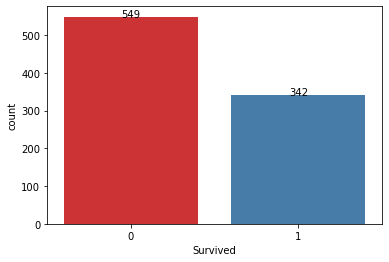

In [6]:
#using sns to visualize the survivors


graph = sns.countplot(x='Survived', data=df, palette='Set1')
i=0
for p in graph.patches:
    height = p.get_height()
    width = p.get_width()
    graph.text(p.get_x()+width/2, height, survived[i],ha='center')
    i+=1
plt.show()

KeyError: 'Survived'

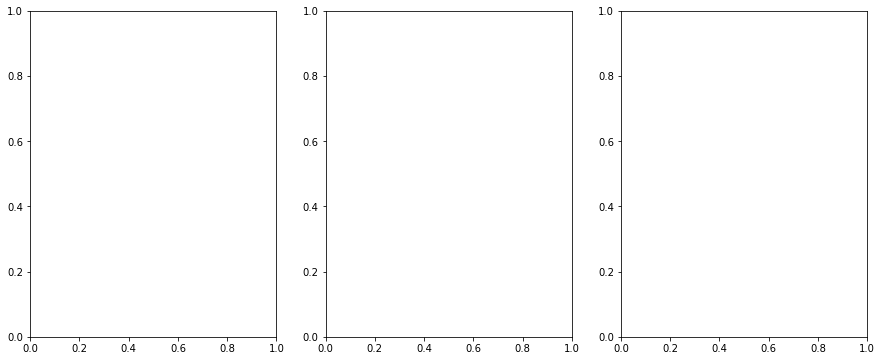

In [31]:
# survivors based on different columns
columns = ['Pclass', 'Sex', 'Embarked']
f, axes = plt.subplots(1,3,figsize=(15,6))
i=0
for column in columns:
    sns.countplot(df[column] , hue = df['Survived'], palette = 'Set1', ax = axes[i])
    i+=1
plt.tight_layout()

### Survival rate on the basis of gender

In [9]:
# survival rate by sex
df['Survived'].groupby(df['Sex']).mean()
# it shows the proportion of passengers survived based on gender

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [10]:
df.pivot_table('Survived', index='Sex', columns='Pclass')

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


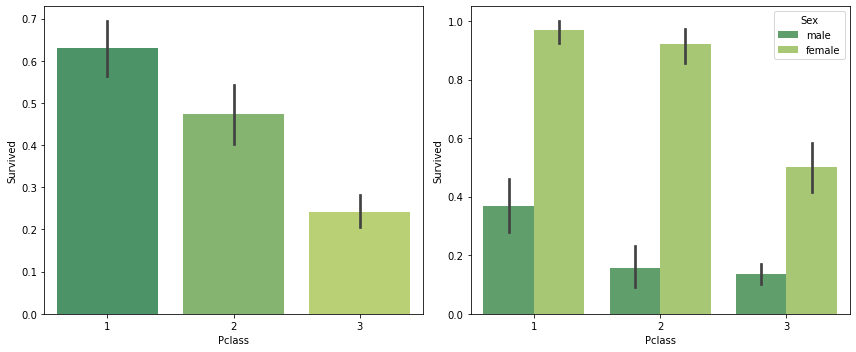

In [11]:
f, axes = plt.subplots(1,2, figsize=(12,5))
sns.barplot(x='Pclass', y='Survived', data=df, palette='summer', ax=axes[0])
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=df, palette='summer', ax=axes[1])
plt.tight_layout()

In [12]:
dfy = df.Survived

df.drop(['PassengerId','Survived','Name','Ticket','Cabin'],axis=1,inplace=True)
df1.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)

In [13]:
df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [14]:
df.isnull().sum()

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [15]:
df1.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [16]:
df1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [17]:
df.describe()

,Pclass,Age,SibSp,Parch,Fare
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,20.125000,0.000000,0.000000,7.910400
50%,3.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,38.000000,1.000000,0.000000,31.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200


In [18]:
df1.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Filling up the nan values

In [19]:
df.Age.isnull().value_counts()

False    714
True     177
Name: Age, dtype: int64

In [20]:
df.Age.fillna(df.Age.median(),inplace=True)

In [21]:
df1.Age.fillna(df1.Age.median(),inplace=True)

In [22]:
df.Embarked.fillna(df.Embarked.mode()[0],inplace=True)

In [23]:
df1.Fare.fillna(df1.Fare.median(),inplace=True)

In [24]:
print(df.Age.isnull().value_counts())
print(df.Embarked.isnull().value_counts())

False    891
Name: Age, dtype: int64
False    891
Name: Embarked, dtype: int64


### Encoding Categorical Dta

In [25]:
from sklearn.preprocessing import LabelEncoder

In [31]:
le = LabelEncoder()

le.fit(df.Sex)
Sex_labeled = le.transform(df.Sex)
df['Sex_labeled'] = Sex_labeled
df.drop(['Sex'],axis=1,inplace=True)

le.fit(df1.Sex)
Sex_labeled = le.transform(df1.Sex)
df1['Sex_labeled'] = Sex_labeled
df1.drop(['Sex'],axis=1,inplace=True)

le.fit(df.Embarked)
Embarked_labeled = le.transform(df.Embarked)
df['Embarked_labeled'] = Embarked_labeled
df.drop(['Embarked'],axis=1,inplace=True)

le.fit(df1.Embarked)
Embarked_labeled = le.transform(df1.Embarked)
df1['Embarked_labeled'] = Embarked_labeled
df1.drop(['Embarked'],axis=1,inplace=True)

In [48]:
df.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_labeled,Embarked_labeled
0,3,22.0,1,0,7.2500,1,2
1,1,38.0,1,0,71.2833,0,0
2,3,26.0,0,0,7.9250,0,2
3,1,35.0,1,0,53.1000,0,2
4,3,35.0,0,0,8.0500,1,2


In [33]:
df1.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_labeled,Embarked_labeled
0,0,3,22.0,1,0,7.2500,1,2
1,1,1,38.0,1,0,71.2833,0,0
2,1,3,26.0,0,0,7.9250,0,2
3,1,1,35.0,1,0,53.1000,0,2
4,0,3,35.0,0,0,8.0500,1,2


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Pclass            891 non-null    int64  
 1   Age               891 non-null    float64
 2   SibSp             891 non-null    int64  
 3   Parch             891 non-null    int64  
 4   Fare              891 non-null    float64
 5   Sex_labeled       891 non-null    int64  
 6   Embarked_labeled  891 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 48.9 KB


In [35]:
df.Age.isnull().value_counts()

False    891
Name: Age, dtype: int64

In [36]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Survived          891 non-null    int64  
 1   Pclass            891 non-null    int64  
 2   Age               891 non-null    float64
 3   SibSp             891 non-null    int64  
 4   Parch             891 non-null    int64  
 5   Fare              891 non-null    float64
 6   Sex_labeled       891 non-null    int64  
 7   Embarked_labeled  891 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


### Standardise the data

In [37]:
x = np.array(df)
x1 = np.array(df1)
y = np.array(dfy)

In [38]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x = scaler.fit_transform(x)
x1 = scaler.fit_transform(x1)

### Applying test train split and applying various machine learning algorithms to the data

In [39]:
from sklearn.model_selection import train_test_split

In [45]:
df.describe()

,Pclass,Age,SibSp,Parch,Fare,Sex_labeled,Embarked_labeled
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,29.361582,0.523008,0.381594,32.204208,0.647587,1.536476
std,0.836071,13.019697,1.102743,0.806057,49.693429,0.477990,0.791503
min,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000,1.000000
50%,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000,2.000000
75%,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000,2.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,2.000000


In [47]:
dfy

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [40]:
x_train, x_test, y_train, y_test = train_test_split(df,dfy,test_size = 0.2)

In [41]:
print('shape of train and test set : ')
print('x_train : ',x_train.shape)
print('x_test : ',x_test.shape)
print('y_train : ',y_train.shape)
print('y_test : ',y_test.shape)

shape of train and test set : 
x_train :  (712, 7)
x_test :  (179, 7)
y_train :  (712,)
y_test :  (179,)


In [42]:
def models(X_train, y_train):
    
    # Logistic Regression
    from sklearn.linear_model import LogisticRegression
    lr = LogisticRegression(random_state=420)
    lr.fit(x_train, y_train)
    
    # KNN
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
    knn.fit(x_train, y_train)
    
    # SVM (linear kernel)
    from sklearn.svm import SVC
    svc_lin = SVC(kernel='linear', random_state=420)
    svc_lin.fit(x_train, y_train)
    
    # SVM (rbf kernel)
    from sklearn.svm import SVC
    svc_rbf = SVC(kernel='rbf', random_state=420)
    svc_rbf.fit(x_train, y_train)
    
    # Gaussian Naive Bayes
    from sklearn.naive_bayes import GaussianNB
    gauss = GaussianNB()
    gauss.fit(x_train, y_train)
    
    # Decision tree classifier
    from sklearn.tree import DecisionTreeClassifier
    dtc = DecisionTreeClassifier(criterion='entropy', random_state=420)
    dtc.fit(x_train, y_train)
    
    # Random Forest Classifier
    from sklearn.ensemble import RandomForestClassifier
    rfc = RandomForestClassifier(n_estimators=20, criterion='entropy', random_state=420)
    rfc.fit(x_train, y_train)
    
    # Printing training accuracy for each model
    print('Training accuracy for logistic regression = ', lr.score(x_train, y_train))
    print('Training accuracy for KNN = ', knn.score(x_train, y_train))
    print('Training accuracy for SVC(Linear) = ', svc_lin.score(x_train, y_train))
    print('Training accuracy for SVC(rbf) = ', svc_rbf.score(x_train, y_train))
    print('Training accuracy for Gaussian Naive Bayes = ', gauss.score(x_train, y_train))
    print('Training accuracy for Decision Tree Classifier = ', dtc.score(x_train, y_train))
    print('Training accuracy for Random Forest Classifier = ', rfc.score(x_train, y_train))
    
    return lr, knn, svc_lin, svc_rbf, gauss, dtc, rfc

In [43]:
model = models(x_train, y_train)

Training accuracy for logistic regression =  0.8061797752808989
Training accuracy for KNN =  0.7893258426966292
Training accuracy for SVC(Linear) =  0.7823033707865169
Training accuracy for SVC(rbf) =  0.6853932584269663
Training accuracy for Gaussian Naive Bayes =  0.7921348314606742
Training accuracy for Decision Tree Classifier =  0.9831460674157303
Training accuracy for Random Forest Classifier =  0.976123595505618
